# PROJECT 2 : DATA WRANGLING

In this project:

    We will extract data from twitter using twitter api.
    Analyze the data together with the one downloaded from udacity.
    Assess the datasets.
    Identify issues
    Resolve the issues(cleaning)
    Analyze the data.
    Report.

### Importing the required packages for our analysis

In [ ]:
import tweepy
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the datasets**

In [92]:
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')
image_df = pd.read_csv('image-predictions.tsv',sep='\t')

**Extracting the data from twitter api**

In [4]:
consumer_key = "xxxxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxxxxxxxxx"
access_token = "xxxxxxxxxxxxxxxxxxxxxxxx"
access_token_secret = "xxxxxxxxxxxxxxxxxxx"

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [6]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweets = []
no_tweets=[]
for tweet_id in archive_df['tweet_id']:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        no_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 156
Rate limit reached. Sleeping for: 128


In [1]:
#tweets

In [9]:
tweet_dict = []
for each_tweet in tweets:
    tweet_dict.append(each_tweet._json)

In [10]:
with open('tweet_json.txt','w') as file:
    file.write(json.dumps(tweet_dict,indent=4))

In [12]:
tweet_list = []
with open('tweet_json.txt',encoding='utf-8') as json_file:
    data = json.load(json_file)
    for each_dic in data:
        tweet_id = each_dic['id']
        tweet_text = each_dic['text']
        favourite_count = each_dic["favorite_count"]
        retweet_count = each_dic['retweet_count']
        source = each_dic["source"]
        tweet_list.append({
            'tweet_id':str(tweet_id),
            'text':tweet_text,
            'favourite_count':int(favourite_count),
            'retweet_count':int(retweet_count),
            'source':source
        })
        tweet_json = pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favourite_count','text','source'])

In [13]:
tweet_json

,tweet_id,retweet_count,favourite_count,text,source
0,892420643555336193,7020,33854,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,5304,29360,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,3487,22075,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,7234,36973,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,7773,35346,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...,...
2322,666049248165822465,37,89,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r..."
2323,666044226329800704,115,247,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r..."
2324,666033412701032449,36,100,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r..."
2325,666029285002620928,39,112,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r..."


In [6]:
tweet_json.to_csv('raw_tweet_json.csv',index=False)

# ASSESSING OUR DATASETS

In [93]:
df_exctracted_tweets = pd.read_csv('raw_tweet_json.csv')
df_exctracted_tweets 

,tweet_id,retweet_count,favourite_count,text,source
0,892420643555336193,7020,33854,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,5304,29360,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,3487,22075,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,7234,36973,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,7773,35346,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...,...
2322,666049248165822465,37,89,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r..."
2323,666044226329800704,115,247,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r..."
2324,666033412701032449,36,100,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r..."
2325,666029285002620928,39,112,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r..."


In [14]:
df_exctracted_tweets.isnull().sum()

tweet_id           0
retweet_count      0
favourite_count    0
text               0
source             0
dtype: int64

In [19]:
df.shape

(2327, 5)

In [11]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [10]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
archive_df.shape

(2356, 17)

In [6]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [7]:
sum(archive_df.duplicated())

0

In [8]:
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [10]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

**Issues**

**archive data**

Timestamp columns should be datetime

The ratings in the numerator should exceed 10 and also remove other extreme values

The denominator ratings should be 10

remove html tags from source.

Remove retweets since they are duplicates

removing a,  an, the from names

drop: retweeted_status_user_id,retweeted_status_user_id,retweeted_status_timestamp columns

**exctracted tweets**

Remove columns we don't need.

**tidiness**

Dog names are in different columns

merge the archive dataset with the extracted one.

# WRANGLING

In [108]:
archive_clean = archive_df.copy()
image_clean = image_df.copy()
twitter_clean = df_exctracted_tweets.copy()

## Cleaning

Timestamp columns should be datetime

**code**

In [115]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

**test**

In [116]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

remove html tags from source

**code**

In [117]:
archive_clean['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [118]:
archive_clean['source'] = archive_clean['source'].str.extract('(W\w+\sC\w+|iP\w+|V\w+|twe\w+)', expand=True)

**test**

In [119]:
archive_clean['source'].value_counts()

iPhone        2042
Vine            91
Web Client      31
tweetdeck       11
Name: source, dtype: int64

The denominator ratings should be 10

**code**

In [120]:
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

**test**

In [121]:
archive_clean['rating_denominator'].value_counts()

10    2153
Name: rating_denominator, dtype: int64

The ratings in the numerator should exceed 10 and also remove other extreme values

**code**

In [122]:
archive_clean = archive_clean[(archive_clean['rating_numerator'] >= 10) & (archive_clean['rating_numerator'] <= 100)]

**test**

In [123]:
archive_clean['rating_numerator'].value_counts()

12    500
10    442
11    425
13    307
14     43
15      1
17      1
26      1
27      1
75      1
Name: rating_numerator, dtype: int64

removing a, an, the from names

In [124]:
archive_clean['name'] = archive_clean.name.replace(['a','an','the'], None)

Dog stages are in different columns

In [125]:
archive_clean['dog_stages'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
#convert to cateogory for easier analysis
archive_clean['dog_stages'] = archive_clean['dog_stages'].astype('category')
#drop the columns after combining them into one
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
archive_clean['dog_stages'].value_counts()

None       1422
pupper      194
doggo        72
puppo        24
floofer      10
Name: dog_stages, dtype: int64

Drop retweets since they are duplicates

In [110]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [111]:
archive_clean['retweeted_status_id'].notnull().sum()

0

In [112]:
archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

drop: retweeted_status_user_id,retweeted_status_user_id,retweeted_status_timestamp columns
    

In [113]:
archive_clean = archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [114]:
archive_clean.isnull().sum()

tweet_id                    0
in_reply_to_status_id    2097
in_reply_to_user_id      2097
timestamp                   0
source                      0
text                        0
expanded_urls              58
rating_numerator            0
rating_denominator          0
name                        0
doggo                       0
floofer                     0
pupper                      0
puppo                       0
dtype: int64

**drop unnecessary columns from the twitter data we extracted using api**

**since they are already on our archive clean**

In [126]:
twitter_clean.head()

,tweet_id,retweet_count,favourite_count,text,source
0,892420643555336193,7020,33854,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,5304,29360,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,3487,22075,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,7234,36973,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,7773,35346,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r..."


In [127]:
twitter_clean = twitter_clean.drop(columns=['text','source'])

In [128]:
twitter_clean.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7020,33854
1,892177421306343426,5304,29360
2,891815181378084864,3487,22075
3,891689557279858688,7234,36973
4,891327558926688256,7773,35346


## Combining the datasets

In [129]:
twitter_archive_master = pd.merge(archive_clean, twitter_clean, how='inner')

In [132]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favourite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7020,33854
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5304,29360
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3487,22075
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7234,36973
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,7773,35346


In [130]:
twitter_archive_master_clean = pd.merge(twitter_archive_master, image_clean, how='inner')

In [134]:
twitter_archive_master_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


**Save dataframes**

In [165]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)
twitter_archive_master_clean.to_csv('twitter_archive_master_clean.csv',index = False)

# ANALYSIS

In [135]:
#a bit of feature engineering
twitter_archive_master_clean['month'] = twitter_archive_master_clean['timestamp'].dt.month
twitter_archive_master_clean['week'] = twitter_archive_master_clean['timestamp'].dt.weekday
twitter_archive_master_clean['day_of_the year'] = twitter_archive_master_clean['timestamp'].dt.dayofyear

In [137]:
twitter_archive_master_clean['year'] = twitter_archive_master_clean['timestamp'].dt.year

Which year had most tweets

In [142]:
twitter_archive_master_clean['year'].value_counts()

2016    816
2015    391
2017    349
Name: year, dtype: int64

In [147]:
def visualize_count(df,x,title):
    plt.figure(figsize=(15,8))
    sns.countplot(x=x,data=df,order=df[x].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

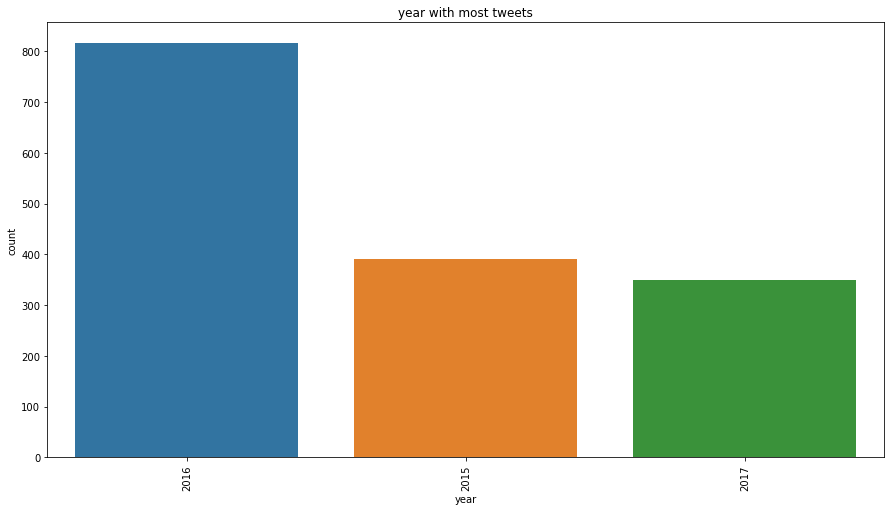

In [148]:
 visualize_count(twitter_archive_master_clean,'year','year with most tweets')

people tweeted more 2016, while 2015 and 2017 were almost the same

month with most tweets

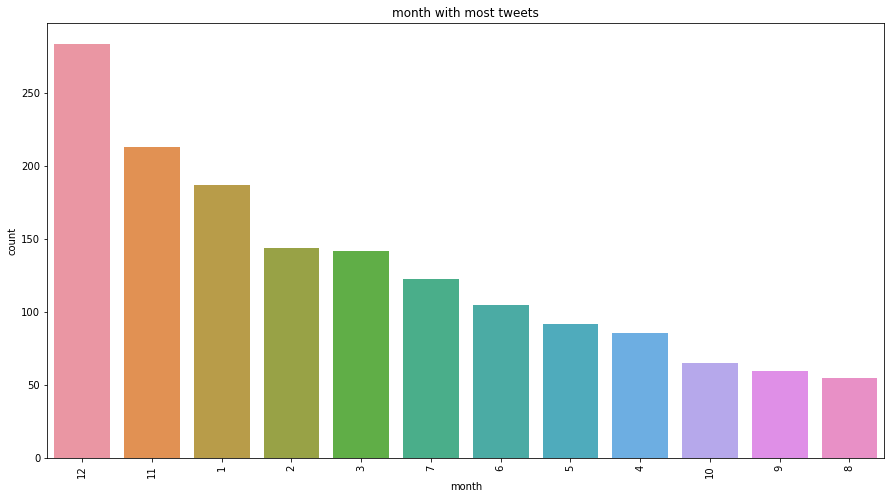

In [149]:
 visualize_count(twitter_archive_master_clean,'month','month with most tweets')

Most people tend to tweet on the 12th month, i.e December

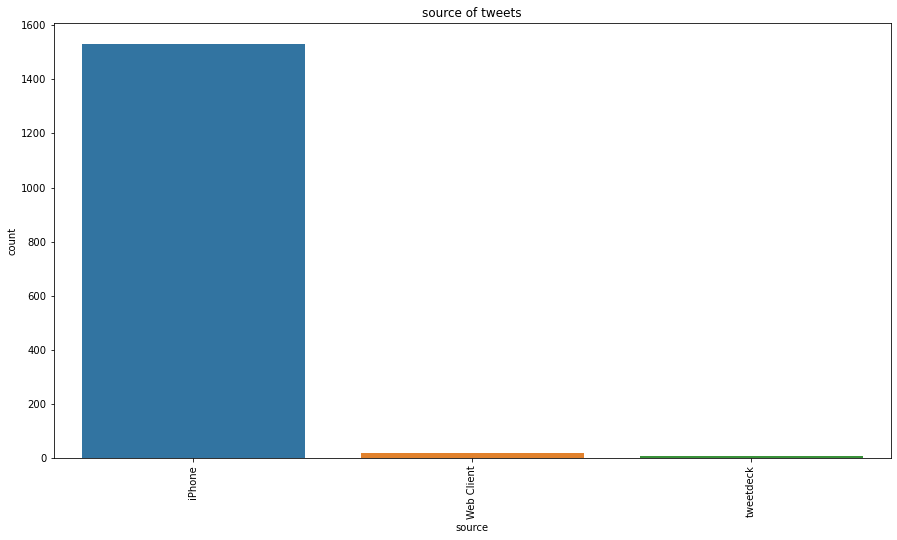

In [155]:
 visualize_count(twitter_archive_master_clean,'source','source of tweets')

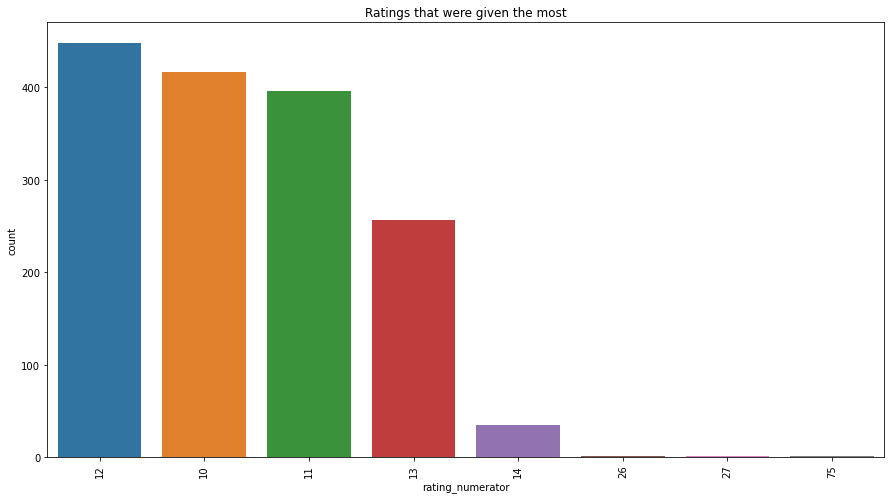

In [163]:
visualize_count(twitter_archive_master_clean,'rating_numerator','Ratings that were given the most')

Most people gave a rating of 12

**Bivariate exploration**

retweet count and favourite count

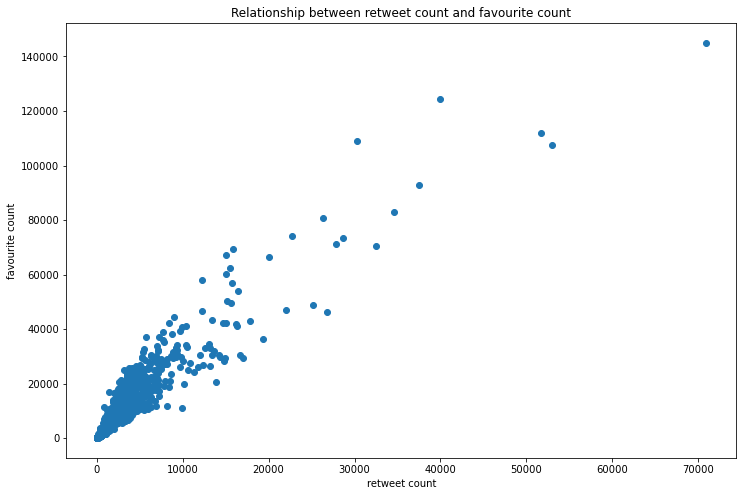

In [164]:
plt.figure(figsize=(12,8))
plt.scatter(data = twitter_archive_master_clean , x='retweet_count', y= 'favourite_count')
plt.title('Relationship between retweet count and favourite count')
plt.xlabel('retweet count')
plt.ylabel('favourite count')
plt.show()

The relationship between retweet count and favourite count is linear. Increase in favourite count increases retweet count.